In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_excel("usa1936-50.xls")

In [5]:
df

,Экономика США,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Год,ВВП(млн.$),K(млн.$),L(тыс.чел.),NaN,NaN,log(Y),log(K),log(L)
1,1936,83278,234236,73426,NaN,NaN,4.92053,5.369654,4.86585
2,1937,90884,254890,77568,NaN,NaN,4.958487,5.406353,4.889683
3,1938,83743,217606,70460,NaN,NaN,4.922949,5.337671,4.847943
4,1939,91530,221746,75131,NaN,NaN,4.961563,5.345856,4.875819
5,1940,101313,228757,79694,NaN,NaN,5.005665,5.359374,4.901426
6,1941,116415,250238,89276,NaN,NaN,5.066009,5.398353,4.950735
7,1942,127434,266469,97056,NaN,NaN,5.105285,5.425647,4.987022
8,1943,136274,266154,101633,NaN,NaN,5.134413,5.425133,5.007035
9,1944,146470,269520,100124,NaN,NaN,5.165749,5.430591,5.000538


In [9]:
Y = df[df.columns[1]][1::].dropna().to_numpy(dtype="int")

In [10]:
Y

array([ 83278,  90884,  83743,  91530, 101313, 116415, 127434, 136274,
       146470, 145052, 140288, 142022, 149895, 147122, 163620,     81])

In [8]:
K = df[df.columns[2]][1::].to_numpy(dtype="int")

In [9]:
K

array([234236, 254890, 217606, 221746, 228757, 250238, 266469, 266154,
       269520, 263098, 252357, 262536, 285700, 277522, 307946])

In [10]:
L = df[df.columns[3]][1::].to_numpy(dtype="int")

In [11]:
L

array([ 73426,  77568,  70460,  75131,  79694,  89276,  97056, 101633,
       100124,  94920,  96671, 100072, 101304,  96784, 100352])

In [12]:
def cobb_douglas1(Y:np.array,K:np.array,L:np.array):
    Y = np.log(Y)
    K = np.log(K)
    L = np.log(L)
    M = len(Y)
    mat = np.array([[M,np.sum(K),np.sum(L)],
                    [np.sum(K),np.sum(K**2),np.sum(K*L)],
                   [np.sum(L),np.sum(K*L),np.sum(L**2)]])
    vec = np.array([np.sum(Y),
                   np.sum(Y*K),
                    np.sum(Y*L)])
    A,alpha,beta = np.linalg.solve(mat,vec)
    return np.e**A,alpha,beta
    

In [13]:
A1,alpha1,beta1 = cobb_douglas1(Y,K,L)

In [14]:
def cobb_douglas2(Y:np.array,K:np.array,L:np.array):
    Z = np.log(Y/L)
    U = np.log(K/L)
    M = len(Y)
    mat = np.array([[M,np.sum(U)],[np.sum(U),np.sum(U**2)]])
    vec = np.array([np.sum(Z),np.sum(Z*U)])
    A,alpha = np.linalg.solve(mat,vec)
    return np.e**A,alpha

In [15]:
A2,alpha2, = cobb_douglas2(Y,K,L)

In [16]:
def f1(K,L):
    return A1* K**alpha1 * L**beta1

In [17]:
def f2(K,L):
    return A2 * K**alpha2 * L**(1 - alpha2)

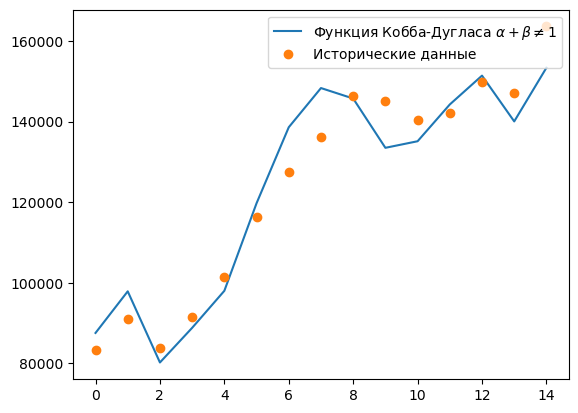

In [18]:
plt.plot([f1(k,l) for k,l in zip(K,L)],label="Функция Кобба-Дугласа $\\alpha + \\beta \\neq 1$")
plt.plot(Y,"o",label="Исторические данные")
plt.legend(loc="upper right")
plt.savefig("cobb-douglas1.pdf", format="pdf", bbox_inches="tight")
plt.show()

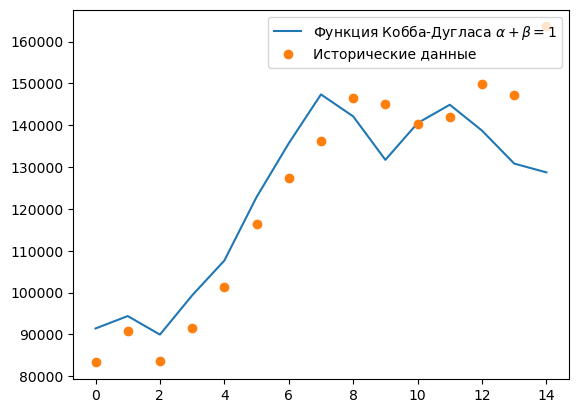

In [19]:
plt.plot([f2(k,l) for k,l in zip(K,L)],label="Функция Кобба-Дугласа $\\alpha + \\beta = 1$")
plt.plot(Y,"o",label="Исторические данные")
plt.legend(loc="upper right")
plt.savefig("cobb-douglas2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [21]:
def isokvanta(c1):
    return lambda L:(c1/A1)**(1/alpha1)*L**(- beta1/alpha1)

In [22]:
iso1 = isokvanta(Y[0])

In [23]:
iso2 = isokvanta(Y[1])

In [24]:
iso3 = isokvanta(Y[5])

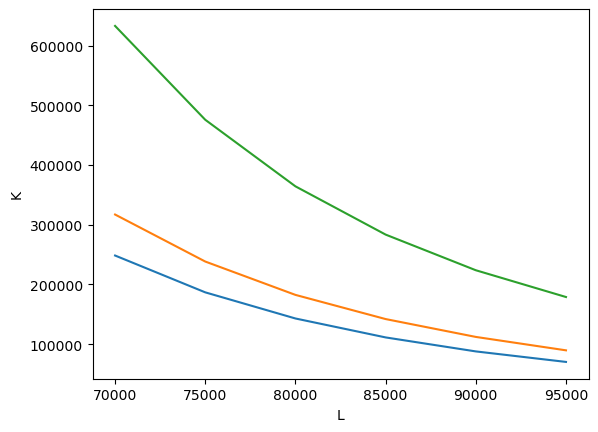

In [40]:
plt.plot([iso1(Li) for Li in np.arange(70000,100000,5000)])
plt.plot([iso2(Li) for Li in np.arange(70000,100000,5000)])
plt.plot([iso3(Li) for Li in np.arange(70000,100000,5000)])
plt.xticks(np.arange(6),np.arange(70000,100000,5000))
plt.xlabel("L")
plt.ylabel("K")
plt.savefig("cobb-douglas3.pdf", format="pdf", bbox_inches="tight")
plt.show()